### Chanel Maps code

General to two cubes with similar velocity axis, define a range of velocity to obtain differents maps

In [141]:
import numpy as np
from matplotlib import patches as mpatches
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.wcs import WCS
from astropy import constants as const
from spectral_cube import SpectralCube

# Define the filenames of the two data cubes

file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/FILES/N159_CII_map.fits'  # Replace with the actual filename of the first cube (this case, first cube is original cube with the VRAD transformed)
file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/resampled_cube.fits'  # Replace with the actual filename of the second cube (this case, second cube is the cube with the spectral resolution changed)

# Open the FITS files
cube1 = SpectralCube.read(file1)
cube2 = SpectralCube.read(file2)

print(cube1.header)
print(cube2.header)


SIMPLE  =                    T / Written by IDL:  Tue Mar 28 14:54:01 2017      BITPIX  =                  -64 / Number of bits per data pixel                  NAXIS   =                    3                                                  NAXIS1  =                   58                                                  NAXIS2  =                   59                                                  NAXIS3  =                  300                                                  DATE    = '2017-03-28'         / Creation UTC (CCCC-MM-DD) date of FITS header  COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    HISTORY PUTAST: Mar 28 14:54:01 2017 World Coordinate System parameters written VELO-LSR=        187000.000000 /                                                DELTAV  =        1000.00000000 /                                                WCSAXES =                    3 / Number 

In [142]:
# Obtain the essential information from the cubes
UNIT1 = cube1.header['CUNIT3']
CRVAL1 = cube1.header['VELO-LSR'] * u.m/u.s # Value of the third axis
CRPIX1 = cube1.header['CRPIX3']  # Reference pixel of the third axis
CDELT1 = cube1.header['DELTAV'] * u.m/u.s # Coordinate increment at reference point

print('UNIT:', UNIT1)
print('CRVAL:', CRVAL1)
print('CRPIX:', CRPIX1)
print('CRDELT:', CDELT1)

print('--------------------')
UNIT2 = cube2.header['CUNIT3']
RESTFRQ2 = cube2.header['RESTFRQ'] * u.Hz  # Rest frequency in Hz
CRVAL2 = cube2.header['CRVAL3'] * u.km/u.s # Value of the third axis
CRPIX2 = cube2.header['CRPIX3']  # Reference pixel of the third axis
CDELT2 = cube2.header['CDELT3'] * u.km/u.s # Coordinate increment at reference point

print('UNIT in cube 2:', UNIT2)
print('RESTFRQ in cube 2:', RESTFRQ2)
print('CRVAL in cube 2:', CRVAL2)
print('CRPIX in cube 2:', CRPIX2)
print('CRDELT in cube 2:', CDELT2)

UNIT: m/s
CRVAL: 187000.0 m / s
CRPIX: 150.0
CRDELT: 1000.0 m / s
--------------------
UNIT in cube 2: km s-1
RESTFRQ in cube 2: 102587476000.0 Hz
CRVAL in cube 2: -130.0 km / s
CRPIX in cube 2: 1.0
CRDELT in cube 2: 1.0 km / s


In [143]:
## Necesitamos la velocidad de la luz para la aplicación de la fórmula Doppler
C = const.c.to(u.km / u.s).value * u.km/u.s  # Velocidad de la luz en km/s
print('\nVelocidad de la luz (C):', C)


# Crear los ejes de frecuencia (aunque no se usarán directamente para el enmascaramiento por velocidad)
FREQ = cube2.with_spectral_unit(u.Hz, rest_value=RESTFRQ2).spectral_axis.to(u.GHz)
print(FREQ)



Velocidad de la luz (C): 299792.458 km / s
[102.63196135 102.63161915 102.63127696 102.63093476 102.63059257
 102.63025037 102.62990818 102.62956598 102.62922379 102.62888159
 102.6285394  102.6281972  102.62785501 102.62751281 102.62717062
 102.62682842 102.62648623 102.62614403 102.62580184 102.62545964
 102.62511745 102.62477525 102.62443306 102.62409086 102.62374867
 102.62340647 102.62306428 102.62272208 102.62237989 102.62203769
 102.6216955  102.6213533  102.62101111 102.62066891 102.62032672
 102.61998452 102.61964233 102.61930013 102.61895794 102.61861574
 102.61827355 102.61793135 102.61758916 102.61724696 102.61690477
 102.61656257 102.61622038 102.61587818 102.61553599 102.61519379
 102.6148516  102.6145094  102.61416721 102.61382501 102.61348282
 102.61314062 102.61279843 102.61245623 102.61211404 102.61177184
 102.61142965 102.61108745 102.61074526 102.61040306 102.61006087
 102.60971867 102.60937648 102.60903428 102.60869209 102.60834989
 102.6080077  102.6076655  102.6

In [144]:
VEL_LSR = CRVAL1.to(u.km/u.s) 
CDEL1 = CDELT1.to(u.km/u.s)
print('Reference VEL in KM/S:', VEL_LSR)
print('CRDELT in KM/S:', CDEL1)

RESTFRQ2 = RESTFRQ2.to(u.GHz)  # Convert to GHz
print('RESTFRQ2 in GHz:', RESTFRQ2)

Reference VEL in KM/S: 187.0 km / s
CRDELT in KM/S: 1.0 km / s
RESTFRQ2 in GHz: 102.58747600000001 GHz


In [145]:
# Check the number of channels in the cubes
nchan1 = cube1.shape[0]
nchan2 = cube2.shape[0]


print('Number of channels in cube:', nchan1)
print('Number of channels in cube2:', nchan2)

Number of channels in cube: 300
Number of channels in cube2: 731


In [146]:
# Obtain the velocity axis and frequency axis
index1 = np.arange(1, nchan1 + 1 ) # Aggregate (+1) because nchan2 print 1 to 728
VEL1 = VEL_LSR + (index1 - CRPIX1) * CDEL1 #Create the velocity axis

index2 = np.arange(1, nchan2 + 1 ) # Aggregate (+1) because nchan2 print 1 to 728
VEL2 = CRVAL2 + (index2 - CRPIX2) * CDELT2 #Create the velocity axis

print('Index:', index1)
print('Velocity:', VEL1)
print('---------------------')
print('Index:', index2)
print('Velocity:', VEL2)


Index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

Define the range of velocities to geneerate nine channel maps

In [147]:
# --------- Define a range velocity
Vel = np.arange(233, 242) *u.km/u.s

# --- Find the closest channel indices for each target velocity ---
# For cube2 (intensity)
channel_indices2 = np.array([np.argmin(np.abs(VEL2 - v)) for v in Vel])
# For cube1 (contours)
channel_indices1 = np.array([np.argmin(np.abs(VEL1 - v)) for v in Vel])

# It's good practice to verify that the found velocities are close to target
print("\n--- Selected Channels ---")
print(f"Target Velocities (km/s): {Vel.value}")
print(f"Cube 2 Actual Velocities (km/s): {VEL2[channel_indices2].value}")
print(f"Cube 1 Actual Velocities (km/s): {VEL1[channel_indices1].value}")



--- Selected Channels ---
Target Velocities (km/s): [233. 234. 235. 236. 237. 238. 239. 240. 241.]
Cube 2 Actual Velocities (km/s): [233. 234. 235. 236. 237. 238. 239. 240. 241.]
Cube 1 Actual Velocities (km/s): [233. 234. 235. 236. 237. 238. 239. 240. 241.]


In [148]:
# --- Contour Level Definition Options ---
# You can choose to define contours based on RMS noise (recommended for signal detection)
# OR by manually specifying a min/max range, number of levels, and scale type.

# Set this to True to use custom min/max/scale contour definition,
# or False to use RMS noise estimation.
use_custom_contours = True

if use_custom_contours:
    # --- Custom Contour Definition Parameters ---
    # Define the minimum and maximum values for your contours.
    # These values should be in the same units as your cube1 data.
    min_contour_value = 5 *u.Unit(cube1.unit)   # Example: Adjust this based on your data's intensity range
    max_contour_value =  15* u.Unit(cube1.unit)   # Example: Adjust this based on your data's intensity range

    # Define the number of contour levels you want.
    num_contour_levels = 10

    # Define the type of spacing for your contour levels:
    contour_scale_type = 'squared'  # Options: 'linear', 'logarithmic', 'quadratic', 'squared'

    print(f"\nUsing custom contour definition with '{contour_scale_type}' scaling.")
    print(f"Min contour value: {min_contour_value:.4e}")
    print(f"Max contour value: {max_contour_value:.4e}")
    print(f"Number of levels: {num_contour_levels}")

    if contour_scale_type == 'linear':
        contour_levels = np.linspace(min_contour_value.value, max_contour_value.value, num_contour_levels) * u.Unit(cube1.unit)
    elif contour_scale_type == 'logarithmic':
        if min_contour_value.value <= 0:
            print("Warning: Cannot use logarithmic scale with non-positive min_contour_value. Falling back to linear.")
            contour_levels = np.linspace(min_contour_value.value, max_contour_value.value, num_contour_levels) * u.Unit(cube1.unit)
        else:
            contour_levels = np.logspace(np.log10(min_contour_value.value), np.log10(max_contour_value.value), num_contour_levels) * u.Unit(cube1.unit)
    elif contour_scale_type == 'quadratic':
        # Simple quadratic spacing: levels are spaced quadratically between min and max
        # You might need to adjust the function based on your specific needs
        x = np.linspace(0, 1, num_contour_levels)
        quad_scaled_values = min_contour_value.value + (max_contour_value.value - min_contour_value.value) * x**2
        contour_levels = quad_scaled_values * u.Unit(cube1.unit)
    elif contour_scale_type == 'squared':
        # Crecimiento abrupto hacia el final (valores más grandes más espaciados)
        x = np.linspace(0, 1, num_contour_levels)
        squared_scaled_values = min_contour_value.value + (max_contour_value.value - min_contour_value.value) * (1 - (1 - x)**2)
        contour_levels = squared_scaled_values * u.Unit(cube1.unit)
    else:
        print("Warning: Invalid 'contour_scale_type'. Falling back to linear spacing.")
        contour_levels = np.linspace(min_contour_value.value, max_contour_value.value, num_contour_levels) * u.Unit(cube1.unit)




Using custom contour definition with 'squared' scaling.
Min contour value: 5.0000e+00
Max contour value: 1.5000e+01
Number of levels: 10


C:\Users\macka\AppData\Local\Temp\ipykernel_21164\481965148.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 0.96])


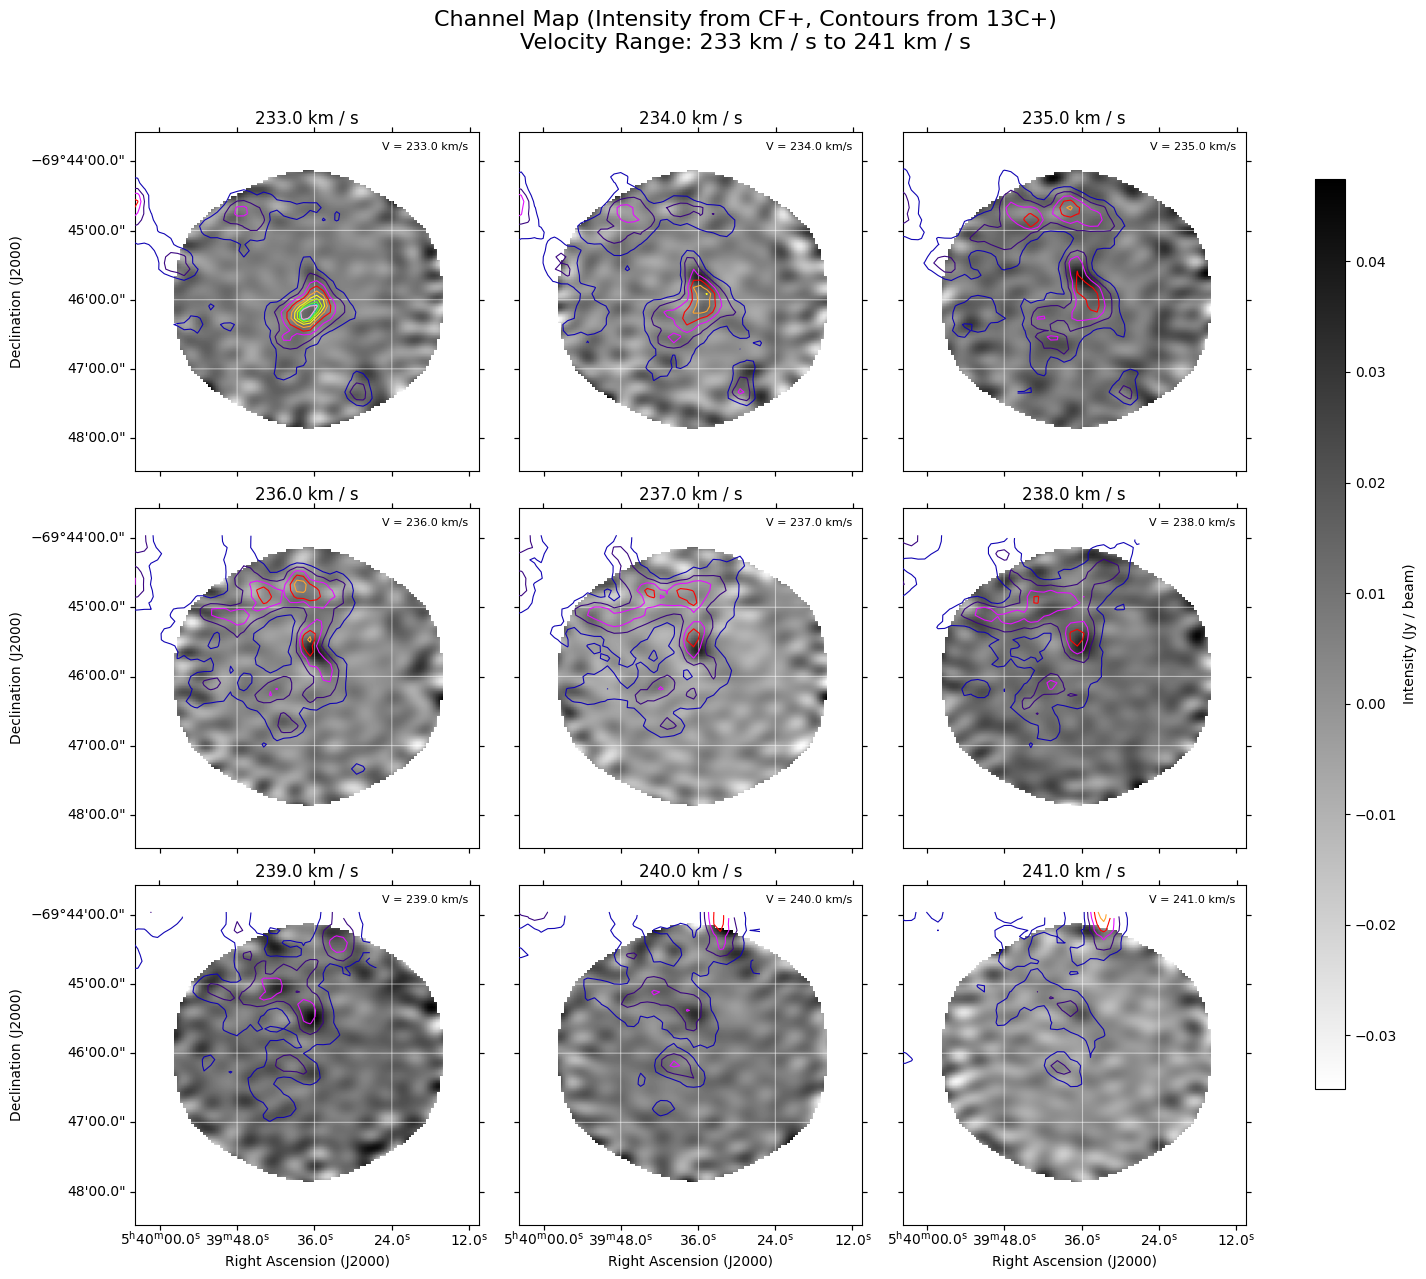

In [149]:

# --- Set up the plot figure ---
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13), # Define the number of rows and column
                         subplot_kw={'projection': cube2.wcs.celestial}, )

fig.suptitle(f'Channel Map (Intensity from CF+, Contours from 13C+)\nVelocity Range: {Vel[0]:.0f} to {Vel[-1]:.0f}', fontsize=16)

axes = axes.ravel() # Flatten the axes array for easy iteration

# --- Plotting loop ---
for i, (idx1, idx2, vel_target) in enumerate(zip(channel_indices1, channel_indices2, Vel)):
    ax = axes[i]

    # Get the 2D slice for the current channel.
    slice_cube2 = cube2[idx2] # SpectralCube slice, retains WCS
    slice_cube1 = cube1[idx1] # SpectralCube slice, retains WCS

    # Get the 2D celestial WCS object for each slice
    wcs_2d_cube2 = slice_cube2.wcs.celestial
    wcs_2d_cube1 = slice_cube1.wcs.celestial

    # --- Plot Intensity from Cube 2 ---
    im = ax.imshow(slice_cube2.value, origin='lower', cmap='binary', aspect='auto',
                    transform=ax.get_transform(wcs_2d_cube2))
    
    colores = ["#1105b4ff", "#3b0681ff", "#e30eff", "#ff0000", "#ffa42e", "#fffb19", "#c8ff00ff","#53ff31", "#00f0c8", "#ff9ed7"]
    # --- Overlay Contours from Cube 1 ---
    ax.contour(slice_cube1.value, levels=contour_levels.value, colors=colores, linewidths=0.8,
                transform=ax.get_transform(wcs_2d_cube1))

    # --- Customize each subplot ---
    ax.set_title(f'{VEL2[idx2]:.1f}', fontsize=12)

    ra = ax.coords[0]
    dec = ax.coords[1]

    ra.set_major_formatter('hh:mm:ss.s')
    dec.set_major_formatter('dd:mm:ss.s')

    ax.coords.grid(True, color='white', ls='solid', alpha=0.5)

    if i % 3 != 0:
        dec.set_ticklabel_visible(False)
        dec.set_axislabel('')
    else:
        dec.set_axislabel("Declination (J2000)", fontsize=10)

    if i < 6:
        ra.set_ticklabel_visible(False)
        ra.set_axislabel('')
    else:
        ra.set_axislabel("Right Ascension (J2000)", fontsize=10)

    # --- Custom Legend for Frame Number ---
    custom_legend_patch = mpatches.Patch(color='none', label=f"V = {VEL2[idx2].value:.1f} km/s")
    ax.legend(handles=[custom_legend_patch], loc='upper right', fontsize=8, frameon=False, handletextpad=0)

# --- Add a single colorbar for the intensity ---
fig.subplots_adjust(right=0.85, wspace=0.1, hspace=0.1)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label=f'Intensity ({cube2.unit})')

# --- Adjust layout and show plot ---
plt.tight_layout(rect=[0, 0, 0.85, 0.96])
plt.show()

### Generate the channel maps with moment 0 with different channel quantities integrers.

In [150]:
# --------- Define a range velocity
Vel = np.arange(233, 242) *u.km/u.s

# --- Find the closest channel indices for each target velocity ---
# For cube2 (intensity)
channel_indices2 = np.array([np.argmin(np.abs(VEL2 - v)) for v in Vel])
# For cube1 (contours)
channel_indices1 = np.array([np.argmin(np.abs(VEL1 - v)) for v in Vel])

# It's good practice to verify that the found velocities are close to target
print("\n--- Selected Channels ---")
print(f"Target Velocities (km/s): {Vel.value}")
print(f"Cube 2 Actual Velocities (km/s): {VEL2[channel_indices2].value}")
print(f"Cube 1 Actual Velocities (km/s): {VEL1[channel_indices1].value}")



--- Selected Channels ---
Target Velocities (km/s): [233. 234. 235. 236. 237. 238. 239. 240. 241.]
Cube 2 Actual Velocities (km/s): [233. 234. 235. 236. 237. 238. 239. 240. 241.]
Cube 1 Actual Velocities (km/s): [233. 234. 235. 236. 237. 238. 239. 240. 241.]


In [151]:
# Define the number of channels to integrate around the target velocity for moment 0
# This value determines how many channels will be used to calculate the integrated intensity (in sequences).
channel_to_integrate = 3
print(f"\nIntegrating {channel_to_integrate} channels around each target velocity for moment 0 calculation.")


Integrating 3 channels around each target velocity for moment 0 calculation.


In [162]:
# --- Defines the general speed range (for reference) ---
# Change this values depending the number of channel to integrate and interest velocities
Vel_start = 230 * u.km / u.s
Vel_end = 245 * u.km / u.s # last velocities is 241 km/s
print(f"Rango de velocidad definido (Vel_start a Vel_end-1): {Vel_start:.0f} a {Vel_end-1*u.km/u.s:.0f}")


# EXACT central velocities for each desired zero point.
target_velocities_for_moments = np.array([231, 234, 247, 240, 243]) * u.km / u.s #Change this value depending the number of channel to integrate
print(f"Las velocidades centrales de los momentos serán: {target_velocities_for_moments.value}")

# La cantidad de momentos a plotear se deriva directamente de las velocidades objetivo
num_moments_to_plot = len(target_velocities_for_moments)
print(f"\nCalculando {num_moments_to_plot} momentos cero.")



Rango de velocidad definido (Vel_start a Vel_end-1): 230 km / s a 244 km / s
Las velocidades centrales de los momentos serán: [231. 234. 247. 240. 243.]

Calculando 5 momentos cero.
